# Getting started

Once you've chosen your scenario, download the data from [the Iowa website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy) in csv format. Start by loading the data with pandas. You may need to parse the date columns appropriately.

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Imported .csv to Iowa_data

file_loc = "../../../Iowa_Liquor_Sales_reduced.csv"
Iowa_data = pd.read_csv(file_loc)

/home/dsi-student/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Explore the data

Perform some exploratory statistical analysis and make some plots, such as histograms of transaction totals, bottles sold, etc.

In [2]:
Iowa_data.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,$9.99,$14.99,12,$179.88,4.5,1.19
1,03/31/2016,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,$12.50,$18.75,2,$37.50,2.0,0.53
2,03/31/2016,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,$5.97,$8.96,6,$53.76,10.5,2.77


In [3]:
Iowa_data.shape

(2709552, 18)

In [4]:
#Dropped all of the rows with null values
Iowa_data.dropna(inplace = True)

In [5]:
#Based on the small proportion of rows with NA values, it is okay to drop those values
Iowa_data.shape

(2692602, 18)

In [6]:
Iowa_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2692602 entries, 0 to 2709551
Data columns (total 18 columns):
Date                     object
Store Number             int64
City                     object
Zip Code                 object
County Number            float64
County                   object
Category                 float64
Category Name            object
Vendor Number            int64
Item Number              int64
Item Description         object
Bottle Volume (ml)       int64
State Bottle Cost        object
State Bottle Retail      object
Bottles Sold             int64
Sale (Dollars)           object
Volume Sold (Liters)     float64
Volume Sold (Gallons)    float64
dtypes: float64(4), int64(5), object(9)
memory usage: 390.3+ MB


In [7]:
#Created a function dollar() that converted string dollar amounts to floats and ran it on the appropriate columns

def dollar(col):
    Iowa_data[col] = Iowa_data[col].map(lambda x: x.replace('$',''))
    Iowa_data[col] = Iowa_data[col].map(lambda x: float(x))

dollar('State Bottle Cost')
dollar('Sale (Dollars)')
dollar('State Bottle Retail')

In [ ]:
#Converted Date column to a DateTime format
Iowa_data['Date'] = pd.to_datetime(Iowa_data['Date'])

In [ ]:
#The above DateTime conversion was a lengthy process so I pickled the DataFrame so I could access it easily without
#having to rerun the DateTime conversion
Iowa_data.to_pickle('./booze')

## Record your findings

Be sure to write out anything observations from your exploratory analysis.

# Mine the data
Now you are ready to compute the variables you will use for your regression from the data. For example, you may want to
compute total sales per store from Jan to March of 2015, mean price per bottle, etc. Refer to the readme for more ideas appropriate to your scenario.

Pandas is your friend for this task. Take a look at the operations [here](http://pandas.pydata.org/pandas-docs/stable/groupby.html) for ideas on how to make the best use of pandas and feel free to search for blog and Stack Overflow posts to help you group data by certain variables and compute sums, means, etc. You may find it useful to create a new data frame to house this summary data.

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

Iowa_data = pd.read_pickle('../booze')

Iowa_data.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,370,87152,Avion Silver,375,9.99,14.99,12,179.88,4.5,1.19
1,2016-03-31,5029,DAVENPORT,52806,82.0,Scott,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,1000,12.50,18.75,2,37.50,2.0,0.53
2,2016-03-31,4959,CEDAR FALLS,50613,7.0,Black Hawk,1071100.0,AMERICAN COCKTAILS,380,63959,Uv Blue Raspberry Lemonade Pet,1750,5.97,8.96,6,53.76,10.5,2.77


In [4]:
#Subseted the data to included only continuous variables.  There were too many categories to run a categorical regressions.
subset = Iowa_data[['Date','Sale (Dollars)','Store Number','County Number','State Bottle Cost', 'State Bottle Retail','Bottles Sold']]

In [5]:
#Using State Bottle Cost and State Bottle retail, calculated an average margin for each transaction
#Using margin and the numbers of bottles sold, calculated total profit of each transaction

subset['Margin'] =  subset['State Bottle Retail'].values - subset['State Bottle Cost'].values
subset['Profit'] = subset['Margin'].values * subset['Bottles Sold']



/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [6]:
#Created new column Month to make it easier to groupby months of sales data
subset['Month'] = subset['Date'].dt.month

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [7]:
subset.head()

,Date,Sale (Dollars),Store Number,County Number,State Bottle Cost,State Bottle Retail,Bottles Sold,Margin,Profit,Month
0,2016-03-31,179.88,5029,82.0,9.99,14.99,12,5.00,60.00,3
1,2016-03-31,37.50,5029,82.0,12.50,18.75,2,6.25,12.50,3
2,2016-03-31,53.76,4959,7.0,5.97,8.96,6,2.99,17.94,3
3,2016-03-31,161.28,2190,77.0,2.24,3.36,48,1.12,53.76,3
5,2016-03-31,34.50,4988,7.0,23.00,34.50,1,11.50,11.50,3


# Refine the data
Look for any statistical relationships, correlations, or other relevant properties of the dataset.

In [8]:
#Removing stores that were only open for business for part of 2015 as they will skew my numbers
#Created DataFrame grouped by store number with max and min transaction month

mask = subset['Date'] < '2015-12-31'
test = subset[mask]
hello = test[['Store Number','Month']]
x = hello.groupby('Store Number')
z = x.agg({'Month':[np.min, np.max]})['Month']
z.reset_index(inplace=True)

new_mask = (z['amin'] == 1) & (z['amax'] == 12)

good_stores = z[new_mask]['Store Number'].values


In [9]:
z.head()

,Store Number,amin,amax
0,2106,1,12
1,2113,1,12
2,2130,1,12
3,2152,1,12
4,2178,1,12


In [10]:
#Created a new dataframe with only transaction data from stores that were open all of 2015
sales_agg = subset[subset['Store Number'].isin(set(good_stores))]

In [11]:
#Created an aggregate of sales in 2015 for each store and housed it in new Data Frame "total_sales"
mask_15 = sales_agg['Date']< '2016-1-1'
group_15 = sales_agg[mask_15].groupby('Store Number')['Sale (Dollars)'].aggregate(np.sum)
total_sales = pd.DataFrame(group_15)
total_sales=total_sales.rename(columns = {'Sale (Dollars)':'2015_sales'})


total_sales.reset_index(inplace=True)
total_sales.head()

,Store Number,2015_sales
0,2106,1433451.46
1,2113,85763.42
2,2130,1107685.25
3,2152,72080.36
4,2178,277987.96


In [12]:
#Mask segments the data into only q1 of 2015
mask = (sales_agg['Date']>='2015-1-1') & (sales_agg['Date']<'2015-4-1')

#This groups the segmented data by Store Number 
groups = sales_agg[mask].groupby('Store Number')

# This creates a data frame called sales with the sum of every stores Q1 sales in 2015
salesq1 = pd.DataFrame(groups['Sale (Dollars)'].aggregate(np.sum))

In [13]:
#Renaming the column properly and reset the index to make easier to add to total_sales
salesq1=salesq1.rename(columns = {'Sale (Dollars)':'2015_q1_sales'})
salesq1.reset_index(inplace=True)

In [14]:
#Add Q1 sales to total_sales df
total_sales.sort_values('Store Number')
salesq1.sort_values('Store Number')
total_sales['2015_q1_sales'] = salesq1['2015_q1_sales']

In [15]:
#Repeat the same process as above for Q1 2016
mask2016 = sales_agg['Date']>'2015-12-31'
group2016 = sales_agg[mask2016].groupby('Store Number')
sales2016 = pd.DataFrame(group2016['Sale (Dollars)'].aggregate(np.sum))
sales2016=sales2016.rename(columns = {'Sale (Dollars)':'2016_q1_sales'})
sales2016.reset_index(inplace=True)
sales2016.sort('Store Number')
total_sales.sort('Store Number')
total_sales['2016_q1_sales'] = sales2016['2016_q1_sales']



/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [16]:
#Adding mean margin to the data frame
group_m = sales_agg.groupby('Store Number')
margin = pd.DataFrame(group_m['Margin'].aggregate(np.mean))
margin.reset_index(inplace=True)
margin.sort('Store Number')
total_sales.sort('Store Number')
total_sales['Margin'] = margin['Margin']



/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [17]:
#Adding total 2015 profit to the data frame
profit_15 = sales_agg['Date'] < '2016-1-1'
group_p = sales_agg[profit_15].groupby('Store Number')
profit = pd.DataFrame(group_p['Profit'].aggregate(np.sum))
profit.reset_index(inplace=True)
profit.sort('Store Number')
total_sales.sort('Store Number')
total_sales['Profit'] = profit['Profit']

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [18]:
#Adding Bottles Sold in Q1 2015 to the table
mask_15q1_bottles = (sales_agg['Date']>= '2015-1-1') & (sales_agg['Date']<'2015-4-1')
group_b = sales_agg[mask_15q1_bottles].groupby('Store Number')
bottles = pd.DataFrame(group_p['Bottles Sold'].aggregate(np.sum))
bottles.reset_index(inplace=True)
bottles.sort('Store Number')
total_sales.sort('Store Number')
total_sales['Bottles Sold_q1_2015'] = bottles['Bottles Sold']

/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/dsi-student/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:7: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [20]:
#Creating a normalized sale price for each bottle sold
total_sales['Normalized_Sales_2015q1'] = total_sales['2015_q1_sales'].values / total_sales['Bottles Sold_q1_2015']

In [21]:
total_sales.head(3)

,Store Number,2015_sales,2015_q1_sales,2016_q1_sales,Margin,Profit,Bottles Sold_q1_2015,Normalized_Sales_2015q1
0,2106,1433451.46,337166.53,337446.81,5.373009,478389.04,99957,3.373116
1,2113,85763.42,22351.86,21663.33,5.322825,28693.18,6483,3.447765
2,2130,1107685.25,277764.46,303978.69,5.125012,369509.12,72544,3.828910


In [23]:
#Renamed the columns to make them easier to call in dot notation
total_sales = total_sales.rename(columns = {'2016_q1_sales':'Sales_q1_2016' , 'Bottles Sold_q1_2015': 'Bottles_Sold_q1_2015', '2015_sales':'Sales_2015',
                                            '2015_q1_sales':'Sales_q1_2015'})
total_sales.head(3)

,Store Number,Sales_2015,Sales_q1_2015,Sales_q1_2016,Margin,Profit,Bottles_Sold_q1_2015,Normalized_Sales_2015q1
0,2106,1433451.46,337166.53,337446.81,5.373009,478389.04,99957,3.373116
1,2113,85763.42,22351.86,21663.33,5.322825,28693.18,6483,3.447765
2,2130,1107685.25,277764.46,303978.69,5.125012,369509.12,72544,3.828910


In [24]:
#Had to drop all of the stores that didn't have sales in both 2015 and 2016
total_sales.dropna(inplace=True)

In [ ]:
#Here I create a column that measures the growth in sales for every store in 2015
group_time = sales_agg[['Store Number','Month','Sale (Dollars)','Date']]
mask_time = group_time['Date']<'2016-1-1'
over_time = group_time[mask_time].groupby(['Store Number','Month']).aggregate(np.sum)
over_time = over_time.reset_index()

In [ ]:
over_time_2015 = over_time[['Month', 'Sale (Dollars)']]
over_time_2015 = over_time_2015.groupby('Month').sum()

In [ ]:
sales_change = over_time

jan_mask = sales_change['Month'] == 1
dec_mask = sales_change['Month'] == 12

sales_jan = sales_change[jan_mask]
sales_dec = sales_change[dec_mask]

sales_dec = sales_dec.reset_index()
del sales_dec['index']

sales_jan = sales_jan.reset_index()
del sales_jan['index']

In [ ]:
sales_jan['Max_Month'] = sales_dec['Month']
sales_jan['Final_Sales'] = sales_dec['Sale (Dollars)']

Sales_Growth = sales_jan

Sales_Growth['Growth'] = (Sales_Growth.Final_Sales.values - Sales_Growth['Sale (Dollars)'].values)/Sales_Growth['Sale (Dollars)'].values


In [ ]:
total_sales['Growth'] = Sales_Growth['Growth']
total_sales.head()

# Build your models

Using scikit-learn or statsmodels, build the necessary models for your scenario. Evaluate model fit.

In [54]:
#Initially I wanted to test how easy it was to predict 2015 sales with 2015 q1 sales,this worked out pretty well.
#I was curious about this because I wanted to see how that could be used for 2016
from sklearn import datasets, linear_model
from sklearn.cross_validation import train_test_split
plt.style.use('fivethirtyeight')

regress = total_sales[['Sales_q1_2015']]

y = total_sales['Sales_2015']
x = regress

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)


lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

print "Score:", model.score(X_test, y_test)


Score: 0.979608565115


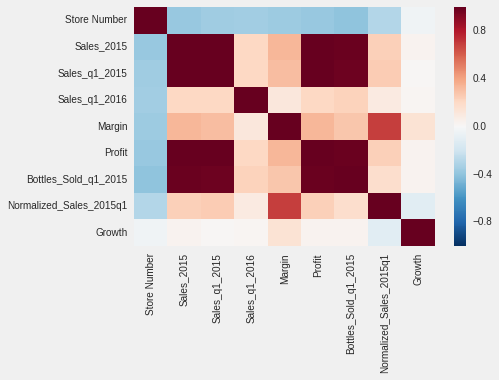

In [55]:
#See the below heat map on the correlations of the different variables
sns.heatmap(total_sales.corr())

In [56]:
import patsy

formula = "Sales_q1_2016 ~ Sales_q1_2015 + Growth + (Sales_q1_2015 * Growth)"

ymat, xmat = patsy.dmatrices(formula, data=total_sales)

In [77]:
X_train, X_test, y_train, y_test = train_test_split(xmat, ymat, test_size=0.33)


lm = linear_model.LinearRegression()

model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
actual = y_test

print "Score:", model.score(X_test, y_test) 

Score: 0.0551569726873


In [78]:
sns_df = pd.DataFrame(actual, columns=['actual'])
sns_df['predictions'] = predictions
sns_df.head()

,actual,predictions
0,16400.22,41089.826476
1,34372.47,44159.992374
2,14063.93,41233.941861
3,4005.39,44672.326250
4,6367.76,47834.054993


## Plot your results

Again make sure that you record any valuable information. For example, in the tax scenario, did you find the sales from the first three months of the year to be a good predictor of the total sales for the year? Plot the predictions versus the true values and discuss the successes and limitations of your models

(0, 200000)

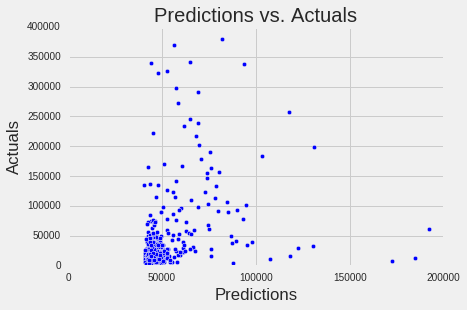

In [79]:
plt.scatter(x=predictions,y=actual)
plt.xlabel('Predictions')
plt.ylabel('Actuals')
plt.title('Predictions vs. Actuals')

plt.ylim(0,400000)
plt.xlim(0,200000)


# Present the Results

Present your conclusions and results. If you have more than one interesting model feel free to include more than one along with a discussion. Use your work in this notebook to prepare your write-up.

In [ ]:
See Medium Post..